In [28]:
#import packages

import requests
import json
import re
import pandas as pd
from bs4 import BeautifulSoup 
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import nltk
import matplotlib.pyplot as plt
import numpy as np

In [14]:
#Read data 
textData = pd.read_csv("AllTextData.csv")
textData = textData[textData["Sentiment"] != "remove"]

textData

,Unnamed: 0,Type,Sentiment,Content
0,0,News,pos,The vision I want people to understand that ve...
1,1,News,neg,All is quiet at a m on a Thursday in Shibuya T...
2,2,News,neg,ADVERTISEMENT Healthy eating and nutrition are...
3,3,News,neg,LEAN RED MEAT A gut healthy heart smart choice...
4,4,News,neg,Why Vegans Don t Eat Honey Honey is a sweet vi...
...,...,...,...,...
208,208,blog,pos,My story did not start at veganism At age I le...
209,209,blog,neg,Actor Samuel L Jackson previously admitted tha...
210,210,blog,neg,Am I Vegan This is a very common question that...
211,211,news,neg,Opinion Veganism isn t necessarily the most et...


In [16]:
#Transform Data
#Build Lemmer
LEMMER = WordNetLemmatizer() 
def MY_LEMMER(str_input):
    words = re.sub(r"[^A-Za-z\-]", " ", str_input).lower().split()
    words = [LEMMER.lemmatize(word) for word in words]
    return words

#CountVectorizer transformation using stemming
MyVect_LEM=CountVectorizer(input='content',
                        analyzer = 'word',
                        stop_words='english',
                        tokenizer=MY_LEMMER,
                        lowercase = True,
                        #max_features=20,
                        max_df = 10,
                        min_df = 3,
                        )

Vect_Lem = MyVect_LEM.fit_transform(textData['Content'])
ColumnNames_s=MyVect_LEM.get_feature_names_out()
CorpusDF_Lem=pd.DataFrame(Vect_Lem.toarray(),columns=ColumnNames_s)
#print(CorpusDF_Lem)
CorpusDF_Lem

/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'u', 'wa'] not in stop_words.
  warnings.warn(


,abandonment,absence,absolute,absolutely,absorb,absorbed,absorbing,absorbs,abundance,abundant,...,yogurt,yorkshire,youth,youthful,z,za,zero,zone,zu,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,1,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
149,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
150,0,0,0,2,0,0,0,0,3,1,...,0,0,0,0,0,0,0,2,0,0
151,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
from sklearn.decomposition import LatentDirichletAllocation 

NUM_TOPICS=4
lda_model = LatentDirichletAllocation(n_components=NUM_TOPICS, max_iter=1000, learning_method='online')
#lda_model = LatentDirichletAllocation(n_components=NUM_TOPICS, max_iter=10, learning_method='online')
   
lda_Z_DF = lda_model.fit_transform(CorpusDF_Lem)
print(lda_Z_DF.shape)  # (NO_DOCUMENTS, NO_TOPICS)

def print_topics(model, vectorizer, top_n=10):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names_out()[i], topic[i])
                    for i in topic.argsort()[:-top_n - 1:-1]])
 
print("LDA Model:")
print_topics(lda_model, MyVect_LEM)



(153, 4)
LDA Model:
Topic 0:
[('cultivated', 39.587021676494174), ('die', 30.549051464332077), ('repair', 28.193962765208116), ('sufficient', 28.045506747304596), ('tissue', 27.592989907358767), ('fatigue', 27.173110158041265), ('whey', 25.884683139541586), ('workout', 25.03724961728772), ('usd', 24.693900742213412), ('hemp', 23.543545605652493)]
Topic 1:
[('saf', 75.06169606098771), ('soil', 66.08394409838172), ('wp', 55.69446633146912), ('uploads', 40.19339829186331), ('billie', 37.800646388809994), ('methane', 29.789217295882498), ('catering', 29.30720590918487), ('planted', 28.87521822031649), ('simnett', 27.675052229855535), ('eilish', 25.877589762720778)]
Topic 2:
[('ice', 104.50257072695814), ('bird', 84.7264647334498), ('hen', 72.3741575387397), ('farmed', 64.90276642870383), ('humanity', 62.509339073411404), ('substantial', 53.983954155864524), ('deer', 52.99599381772004), ('japanese', 46.440400537404734), ('indigenous', 46.26705752288844), ('worker', 41.736155223153524)]
Topi

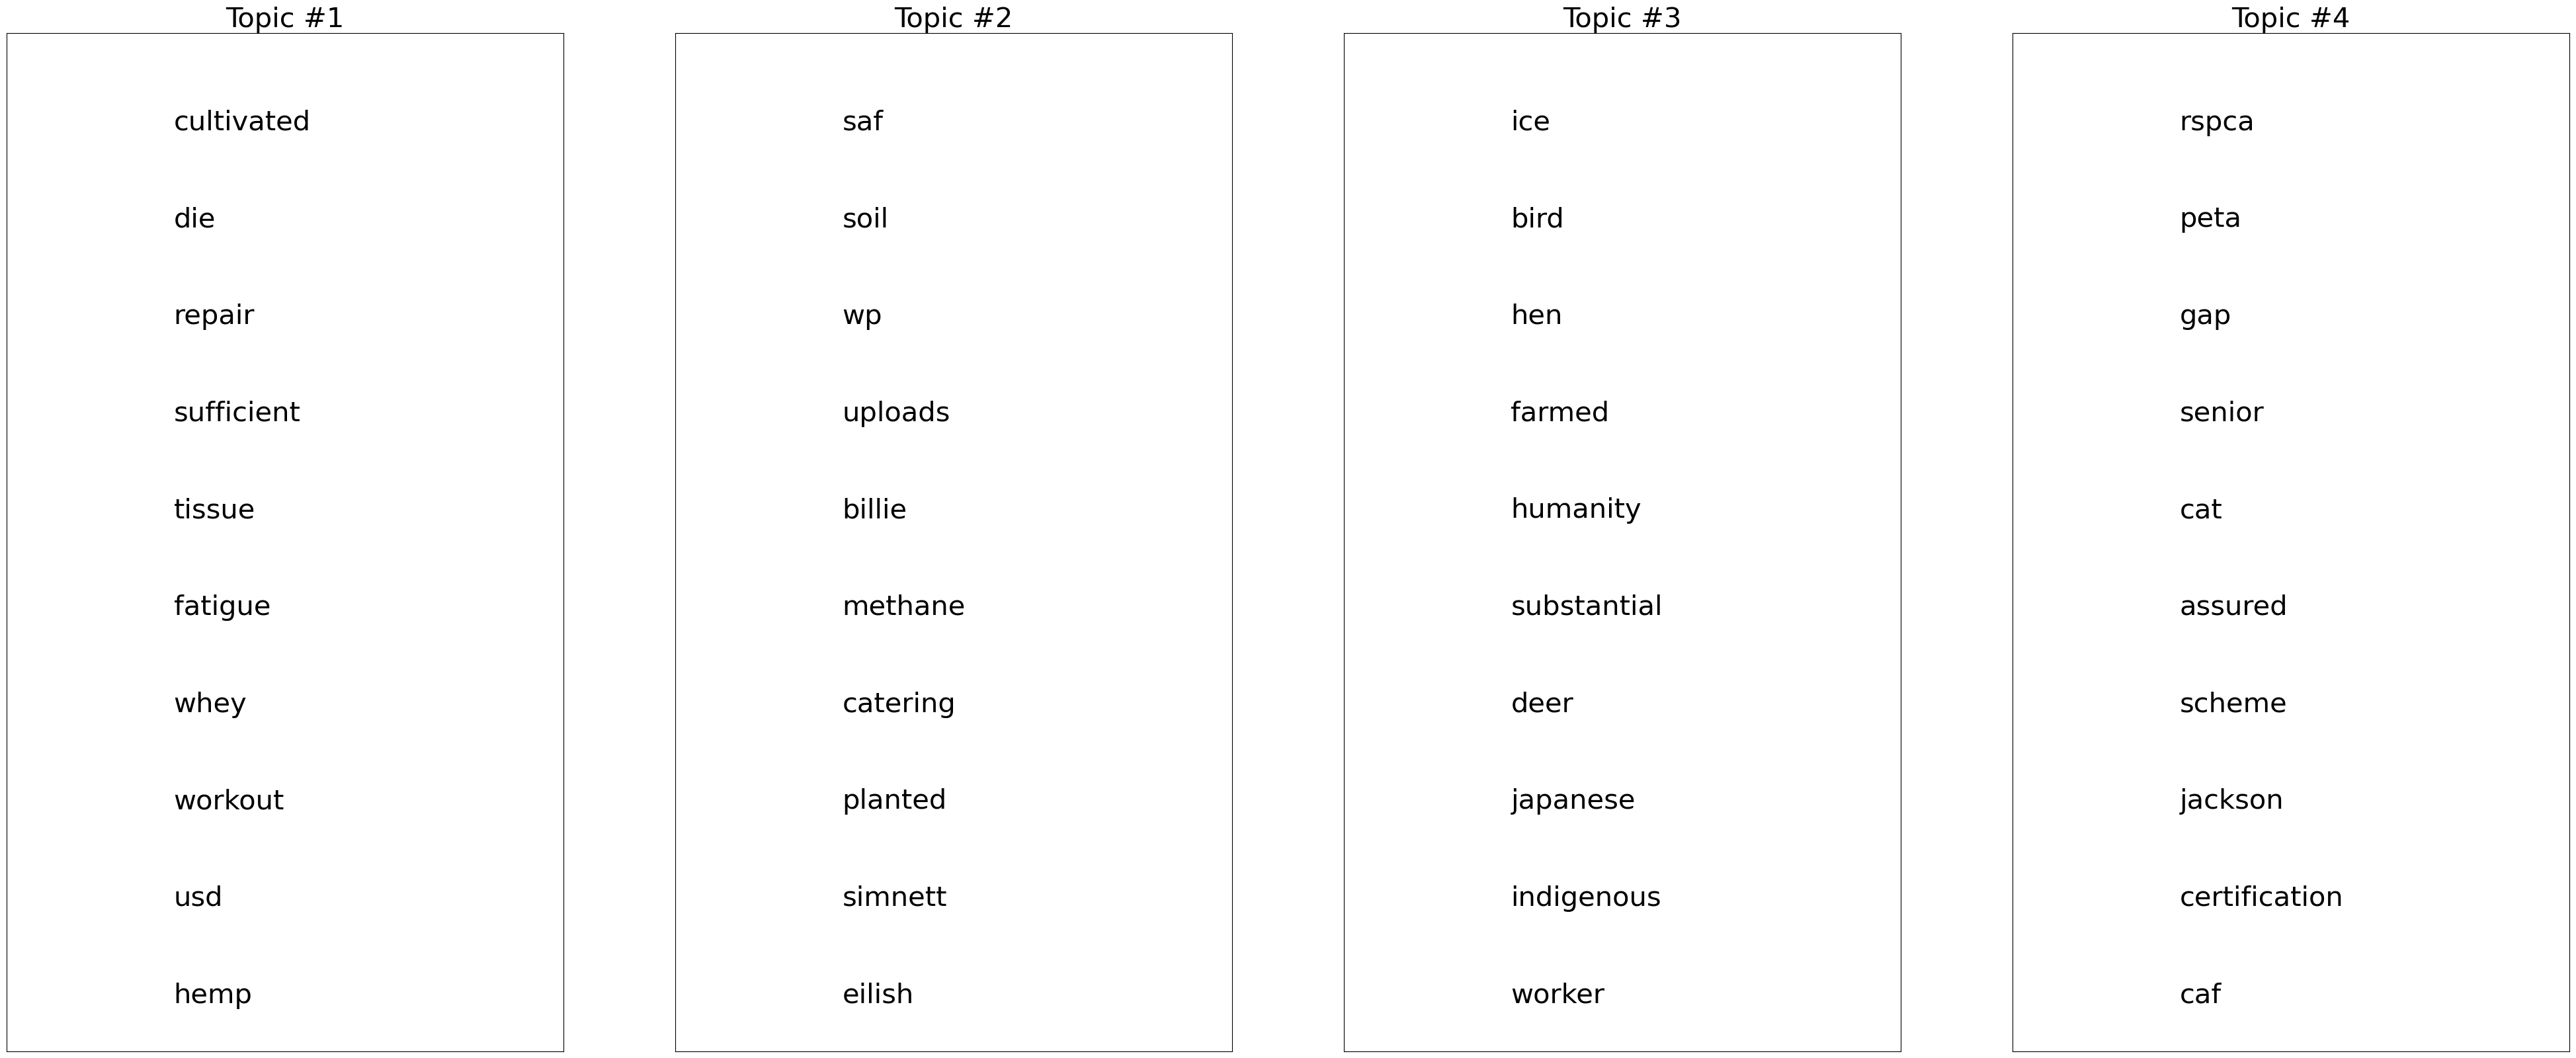

In [53]:
################ Another fun vis for LDA
plt.figure(figsize=(50,20))
word_topic = np.array(lda_model.components_)
#print(word_topic)
word_topic = word_topic.transpose()

num_top_words = 10
vocab_array = np.asarray(ColumnNames_s)

#fontsize_base = 70 / np.max(word_topic) # font size for word with largest share in corpus
fontsize_base = 60

for t in range(NUM_TOPICS):
    plt.subplot(1, NUM_TOPICS, t + 1)  # plot numbering starts with 1
    plt.ylim(0, num_top_words + 0.5)  # stretch the y-axis to accommodate the words
    plt.xticks([])  # remove x-axis markings ('ticks')
    plt.yticks([]) # remove y-axis markings ('ticks')
    plt.title('Topic #{}'.format(t+1), fontsize=30)
    top_words_idx = np.argsort(word_topic[:,t])[::-1]  # descending order
    top_words_idx = top_words_idx[:num_top_words]
    top_words = vocab_array[top_words_idx]
    top_words_shares = word_topic[top_words_idx, t]
    for i, (word, share) in enumerate(zip(top_words, top_words_shares)):
        plt.text(0.3, num_top_words-i-0.5, word, fontsize=fontsize_base/2)
                 ##fontsize_base*share)


plt.savefig("TopicsVis.pdf")
plt.show()

In [78]:

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import pyLDAvis.lda_model  # Correct import for LDA visualization

#import pyLDAvis.sklearn as LDAvis
import pyLDAvis


# ## 
pyLDAvis.enable_notebook() ## not using notebook


In [88]:
# Convert BoW matrix to document-topic distribution
topic_term_dists = lda_model.components_ / lda_model.components_.sum(axis=1)[:, np.newaxis]
doc_topic_dists = lda_Z_DF
doc_lengths = np.array(Vect_Lem.sum(axis=1)).flatten()
vocab = MyVect_LEM.get_feature_names_out()
term_frequency = np.array(Vect_Lem.sum(axis=0)).flatten()

In [90]:
panel = pyLDAvis.prepare(
    topic_term_dists=topic_term_dists, 
    doc_topic_dists=doc_topic_dists, 
    doc_lengths=doc_lengths, 
    vocab=vocab, 
    term_frequency=term_frequency
)

# Display the visualization
pyLDAvis.display(panel)

In [92]:
pyLDAvis.save_html(panel, 'lda_visualization.html')
